In [24]:
# %load_ext lab_black

## Name : Alli Khadga Jyoth
## Roll.No : 19024
## Dept : DSE

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
import warnings

warnings.filterwarnings("ignore")

<!-- ## Please change the file path for 'dfx', 'dfy' and 'Final' when running  -->
<span style="color:red;font-weight:700;font-size:20px">
   Please change the file path for 'dfx', 'dfy' and 'Final' when running 
</span>

In [3]:
dfx = pd.read_csv("data/training_data.csv", header=None)
dfx

,0,1
0,-0.235312,1.057181
1,0.812545,-0.551579
2,1.435676,-0.448038
3,1.612300,-0.311149
4,0.336496,0.087980
...,...,...
4495,-0.578848,0.689333
4496,-0.084657,1.019098
4497,1.897556,-0.094781
4498,1.373081,-0.399360


In [4]:
dfy = pd.read_csv("data/training_data_class_labels.csv", header=None)

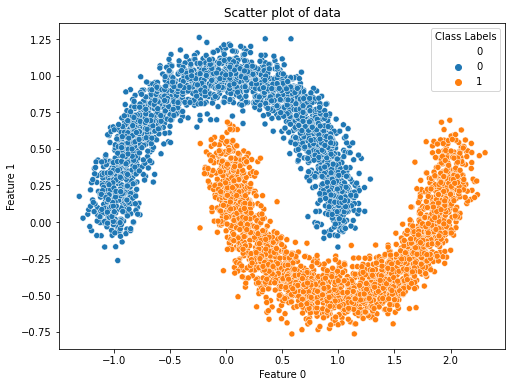

In [5]:
plt.figure(figsize=(8, 6))
ax = sns.scatterplot(data=dfx, x=0, y=1, hue=dfy[0])
ax.set(xlabel="Feature 0", ylabel="Feature 1", title="Scatter plot of data")
ax.legend(title="Class Labels")
plt.show()

In [6]:
x_train, x_test, y_train, y_test = train_test_split(
    dfx.values, dfy.values, test_size=0.2, random_state=5
)
x_train

array([[ 1.70058748, -0.048074  ],
       [ 0.17514851, -0.09510135],
       [ 0.89720271,  0.4388597 ],
       ...,
       [ 1.0513034 , -0.03997969],
       [ 2.08456019,  0.05894791],
       [ 0.25368387, -0.10397291]])

### Naive Bayes

In [7]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB

#### Gaussian Naive Bayes

In [8]:
modelGNB = GaussianNB()
modelGNB.fit(x_train, y_train.ravel())

GaussianNB()

In [9]:
predGNB = modelGNB.predict(x_test)

In [10]:
print(classification_report(y_test, predGNB))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       455
           1       0.88      0.88      0.88       445

    accuracy                           0.88       900
   macro avg       0.88      0.88      0.88       900
weighted avg       0.88      0.88      0.88       900



#### Bernoulli Naive Bayes

In [11]:
modelBNB = BernoulliNB()
modelBNB.fit(x_train, y_train.ravel())

BernoulliNB()

In [12]:
predBNB = modelBNB.predict(x_test)
print(classification_report(y_test, predBNB))

              precision    recall  f1-score   support

           0       0.75      0.97      0.85       455
           1       0.96      0.67      0.79       445

    accuracy                           0.82       900
   macro avg       0.86      0.82      0.82       900
weighted avg       0.85      0.82      0.82       900



### Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
modelLog = LogisticRegression()
log_parameters = {
    "C": np.logspace(-2, -1, 30),
    "penalty": ["l1", "l2", "elasticnet", "none"],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
}
clfLog = GridSearchCV(
    modelLog, log_parameters, cv=10, verbose=0, n_jobs=11, scoring="f1_macro"
)
clfLog.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=11,
             param_grid={'C': array([0.01      , 0.01082637, 0.01172102, 0.01268961, 0.01373824,
       0.01487352, 0.01610262, 0.01743329, 0.01887392, 0.0204336 ,
       0.02212216, 0.02395027, 0.02592944, 0.02807216, 0.03039195,
       0.03290345, 0.03562248, 0.0385662 , 0.04175319, 0.04520354,
       0.04893901, 0.05298317, 0.05736153, 0.06210169, 0.06723358,
       0.07278954, 0.07880463, 0.08531679, 0.09236709, 0.1       ]),
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='f1_macro')

In [15]:
clfLog.best_params_

{'C': 0.08531678524172806, 'penalty': 'l1', 'solver': 'liblinear'}

In [16]:
predLog = clfLog.predict(x_test)
print(classification_report(y_test, predLog))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       455
           1       0.88      0.88      0.88       445

    accuracy                           0.88       900
   macro avg       0.88      0.88      0.88       900
weighted avg       0.88      0.88      0.88       900



### K-NearestNeighbors

In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
modelKNN = KNeighborsClassifier()
params = {
    "n_neighbors": np.arange(2, 10, 1),
    "metric": [
        "cityblock",
        "cosine",
        "euclidean",
        "haversine",
        "l1",
        "l2",
        "manhattan",
        "nan_euclidean",
    ],
    "weights": ["uniform", "distance"],
    "algorithm": ["auto", "ball_tree", "kd_tree", "brute"],
}
clfKNN = GridSearchCV(modelKNN, params, cv=10, n_jobs=11)
clfKNN.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=11,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'metric': ['cityblock', 'cosine', 'euclidean',
                                    'haversine', 'l1', 'l2', 'manhattan',
                                    'nan_euclidean'],
                         'n_neighbors': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'weights': ['uniform', 'distance']})

In [19]:
clfKNN.best_params_

{'algorithm': 'auto',
 'metric': 'cityblock',
 'n_neighbors': 2,
 'weights': 'distance'}

In [20]:
predKNN = clfKNN.predict(x_test)
print(classification_report(y_test, predKNN))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       455
           1       1.00      1.00      1.00       445

    accuracy                           1.00       900
   macro avg       1.00      1.00      1.00       900
weighted avg       1.00      1.00      1.00       900



### Final test data predictions

In [21]:
Final = pd.read_csv(
    "data/test_data.csv", header=None
)  # Change the path inorder when running
Final

,0,1
0,0.245646,-0.267591
1,2.042604,0.380046
2,0.606186,0.645305
3,0.282751,0.957673
4,-0.429242,0.961515
...,...,...
495,1.149873,-0.436497
496,1.539536,-0.163840
497,1.064805,0.367134
498,0.479972,0.825712


> Using KNN model as it has the highest accuracy and f1 score

In [22]:
predictions = clfKNN.predict(Final)
predictions

array([1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,

### Saving the predicted values as a txt file

In [23]:
np.savetxt("test_data_prediction.txt", predictions, delimiter="\n", fmt="%.0f")